# How Neural Networks Work

An MLP consists of multiple layers of neurons: an input layer, one or more hidden layers, and an output layer. Each neuron in one layer is connected to all neurons in the next layer. The network transforms inputs through these layers using a series of linear and nonlinear functions to predict the target output.

## Structure of  Neural Network
For an MLP with:
- Input layer: $ X = [x_1, x_2, \dots, x_n] $
- Hidden layers: With activations $ a^{(l)} $ and weights $ W^{(l)} $ and biases $ b^{(l)} $, where $ l $ denotes the layer.
- Output layer: $ \hat{y} = f(a^{(L)}) $, where $ L $ is the final layer, and $ f $ is the activation function.

The MLP performs the following operations:
- Linear transformation: $ z^{(l)} = W^{(l)} a^{(l-1)} + b^{(l)} $
- Nonlinear activation: $ a^{(l)} = \sigma(z^{(l)}) $

For the output layer:
- Output: $ \hat{y} = \sigma(W^{(L)} a^{(L-1)} + b^{(L)}) $

### Loss Function
The loss $ \mathcal{L} $ measures the difference between the predicted output $ \hat{y} $ and the true label $ y $. A common loss function is Mean Squared Error (MSE) for regression or Cross-Entropy Loss for classification:

$$
\mathcal{L} = \frac{1}{2} (\hat{y} - y)^2 \quad \text{(for regression)}
$$

### Back propagation Algorithm
Back propagation updates the weights of the MLP using the gradient of the loss function with respect to the model’s parameters (weights and biases). To calculate these gradients, we use the **chain rule** of calculus.

#### Chain Rule
If a function $ y $ depends on $ u $, and $ u $ depends on $ x $, the derivative of $ y $ with respect to $ x $ can be found using:

$$
\frac{dy}{dx} = \frac{dy}{du} \cdot \frac{du}{dx}
$$
In the MLP, backpropagation applies this rule to calculate the gradients layer by layer, starting from the output and propagating backward through the network.

#### Steps in Backpropagation:
1. **Forward Pass**: Compute activations for each layer, $ a^{(l)} $, and store them.
2. **Loss Calculation**: Compute the loss $ \mathcal{L}(\hat{y}, y) $.
3. **Backpropagate Errors**:
   - Calculate the gradient of the loss with respect to the output $ \hat{y} $.
   - Propagate the error backwards using the chain rule to update the weights.

The gradients are computed as:

$$
\frac{\partial \mathcal{L}}{\partial W^{(l)}} = \delta^{(l)} (a^{(l-1)})^T
$$

where $ \delta^{(l)} $ is the error term for layer $ l $, which is computed recursively:

$$
\delta^{(L)} = \frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot \sigma'(z^{(L)})
$$

$$
\delta^{(l)} = (\delta^{(l+1)} W^{(l+1)}) \cdot \sigma'(z^{(l)})
$$

4. **Update Weights**: After calculating the gradients, update the weights using gradient descent:
   
$$
W^{(l)} = W^{(l)} - \eta \frac{\partial \mathcal{L}}{\partial W^{(l)}}
$$
where $ \eta $ is the learning rate.

### Toy Example

Let's take a simple 2-layer MLP with one input, one hidden layer (2 neurons), and one output. The input is $ x = 1 $, the target is $ y = 0 $, and we use a sigmoid activation function.

1. **Initialization**:
   - Input to hidden weights: $ W^{(1)} = [[0.15, 0.2], [0.25, 0.3]] $
   - Hidden to output weights: $ W^{(2)} = [0.4, 0.45] $
   - Biases: $ b^{(1)} = [0.35], b^{(2)} = 0.6 $

2. **Forward pass**:
   
   $$
   z^{(1)} = W^{(1)} \cdot x + b^{(1)} = [0.5, 0.6]
   $$

   $$
   a^{(1)} = \sigma(z^{(1)}) = [0.622, 0.645]
   $$

   $$
   z^{(2)} = W^{(2)} \cdot a^{(1)} + b^{(2)} = 1.105
   $$

   $$
   \hat{y} = \sigma(z^{(2)}) = 0.751
   $$

3. **Loss calculation**:
   
   $$
   \mathcal{L} = \frac{1}{2} (\hat{y} - y)^2 = 0.282
   $$

4. **Backward pass**:
   - Output layer error:
  
     $$
     \delta^{(2)} = (\hat{y} - y) \cdot \sigma'(z^{(2)}) = 0.139
     $$
   - Hidden layer error:
  
     $$
     \delta^{(1)} = \delta^{(2)} W^{(2)} \cdot \sigma'(z^{(1)}) = [0.013, 0.014]
     $$

5. **Update weights** (with learning rate $ \eta = 0.5 $):
   
   $$
   W^{(2)} = W^{(2)} - \eta \delta^{(2)} a^{(1)} = [0.37, 0.42]
   $$
   
   $$
   W^{(1)} = W^{(1)} - \eta \delta^{(1)} x = [[0.144, 0.19], [0.236, 0.286]]
   $$
   

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple MLP model
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(1, 2)  # 1 input, 2 hidden neurons
        self.fc2 = nn.Linear(2, 1)  # 2 hidden neurons, 1 output
    
    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x

# Initialize model, loss function, and optimizer
model = SimpleMLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.5)

# Sample data
x = torch.tensor([[1.0]])  # Input
y = torch.tensor([[0.0]])  # Target

# Training loop
epochs = 500
for epoch in range(epochs):
    # Forward pass
    output = model(x)
    loss = criterion(output, y)
    
    # Backward pass
    optimizer.zero_grad()  # Clear previous gradients
    loss.backward()  # Compute gradients
    optimizer.step()  # Update weights
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Final output
print(f'Final prediction: {model(x).item()}')

Epoch 0, Loss: 0.1016080379486084
Epoch 100, Loss: 0.004436768125742674
Epoch 200, Loss: 0.0020264554768800735
Epoch 300, Loss: 0.0012776795774698257
Epoch 400, Loss: 0.0009210538701154292
Final prediction: 0.02673455886542797




## Computation Graph (Auto diff)?

 ```{image}  https://github.com/akkefa/ml-notes/releases/download/v0.1.0/computational_graph.png
:align: center
:alt: Computation Graph
:width: 80%
```

Backpropagation calculates the gradient of the loss function with respect to each weight in the neural network. It does this by:
1. **Forward Pass:** The network makes predictions, and the loss is computed.
2. **Backward Pass (Backpropagation):** The gradient of the loss w.r.t. each parameter is computed by following the chain rule along the computation graph.

### Key Concepts:
- **Chain Rule:** The chain rule is used to compute the derivative of a composite function. If a variable $ z $ depends on $ y $, and $ y $ depends on $ x $, then:
  
  $$
  \frac{dz}{dx} = \frac{dz}{dy} \cdot \frac{dy}{dx}
  $$

- **Computation Graph:** Backpropagation operates on a computation graph where:
  - Each node represents an operation or variable.
  - Arrows represent data dependencies.
  
  During backpropagation, the gradient flows backward through the edges, from the loss to each parameter.

---

### Detailed Example of Backpropagation with a Simple Neural Network

Let’s consider a simple network with one input $ x $, one weight $ w $, and an output $ y $:

$$
y = w \cdot x
$$
$$
L = \frac{1}{2} (y - t)^2
$$

Where $ t $ is the target value and $ L $ is the loss function.

#### Forward Pass:
1. Compute the output: 
   
   $$
   y = w \cdot x
   $$
2. Compute the loss:
   
   $$
   L = \frac{1}{2} (y - t)^2
   $$

#### Backward Pass (Backpropagation):
We want to compute the gradient of the loss $ L $ w.r.t the weight $ w $, i.e., $ \frac{dL}{dw} $.

Using the chain rule:
1. Compute $ \frac{dL}{dy} $:
   
   $$
   \frac{dL}{dy} = (y - t)
   $$
2. Compute $ \frac{dy}{dw} $:
   
   $$
   \frac{dy}{dw} = x
   $$
3. Combine using the chain rule:
   
   $$
   \frac{dL}{dw} = \frac{dL}{dy} \cdot \frac{dy}{dw} = (y - t) \cdot x
   $$

This is the gradient that backpropagation computes and uses to update the weight $ w $ during training.

---

### Computation Graph for Backpropagation

Let's build the computation graph for the above example:

1. $ z1 = w \cdot x $ (Multiplication)
2. $ z2 = z1 - t $ (Subtraction)
3. $ L = \frac{1}{2} z2^2 $ (Squared error)

Each node in the graph represents an operation or variable, and we can propagate gradients backward from the loss function to compute the gradients of all inputs.


### Example in PyTorch: Backpropagation

Let’s implement the above example using PyTorch's autograd:

**Explanation:**
1. We define a scalar $ x $, weight $ w $, and target $ t $.
2. We compute the output $ y = w \cdot x $ and the loss $ L = \frac{1}{2}(y - t)^2 $.
3. Using `loss.backward()`, PyTorch computes the gradient of the loss w.r.t. $ w $ via backpropagation. The result is stored in `w.grad`.


In [9]:
import torch

# Initialize input, weight, and target
x = torch.tensor(2.0, requires_grad=False)
w = torch.tensor(1.5, requires_grad=True)
t = torch.tensor(5.0, requires_grad=False)

# Forward pass: Compute output and loss
y = w * x
loss = 0.5 * (y - t)**2

# Backward pass: Compute gradients
loss.backward()

# Output the gradient of the loss w.r.t. w
print(f"Gradient of the loss with respect to w: {w.grad}")

Gradient of the loss with respect to w: -4.0


### Example 1

 ```{image}  https://github.com/akkefa/ml-notes/releases/download/v0.1.0/computational_graph.png
:align: center
:alt: Computation Graph
:width: 80%
```

The computation graph you shared represents the function:

$$
f(w, x) = \frac{1}{1 + e^{-(w_0 x_0 + w_1 x_1 + w_2)}}
$$

This is the sigmoid function applied to a linear combination of weights and inputs. Here's a breakdown of the process to compute the forward pass and the backpropagation (auto-differentiation) to calculate the gradients of each variable.

#### Forward Pass (Step by Step)

Given the inputs from the graph:
- $ w_0 = 2.0 $, $ x_0 = -1.0 $
- $ w_1 = -3.0 $, $ x_1 = -2.0 $
- $ w_2 = -3.0 $

The steps are as follows:
1. **Multiply** $ w_0 $ and $ x_0 $: $ w_0 \times x_0 = 2.0 \times (-1.0) = -2.0 $
2. **Multiply** $ w_1 $ and $ x_1 $: $ w_1 \times x_1 = -3.0 \times (-2.0) = 6.0 $
3. **Sum the results**: $ -2.0 + 6.0 + (-3.0) = 1.0 $
4. **Negate** the sum: $ -1.0 $
5. **Exponentiation** $ e^{-1.0} \approx 0.367879 $
6. **Add 1**: $ 0.367879 + 1 = 1.367879 $
7. **Inverse**: $ \frac{1}{1.367879} \approx 0.731059 $

Thus, the output of the forward pass is approximately $ f(w, x) = 0.731059 $.

#### Backward Pass (Auto-Differentiation)

For the backward pass, we'll calculate the derivatives of the output with respect to each of the weights and inputs.

The key operations are:
- Chain rule: $ \frac{df}{dx} = \frac{df}{dz} \times \frac{dz}{dx} $, where $ z $ is an intermediate variable.
- Sigmoid derivative: $ \sigma'(z) = \sigma(z) \times (1 - \sigma(z)) $.

#### Backpropagation Steps

1. **Output gradient w.r.t final value**:
The derivative of $ \frac{1}{x} $ with respect to $ x $ can be calculated using the power rule for differentiation. We can rewrite $ \frac{1}{x} $ as $ x^{-1} $.

Now, applying the power rule, which states that $ \frac{d}{dx}(x^n) = n x^{n-1} $, we get:

$$
\frac{d}{dx}(x^{-1}) = -1 \cdot x^{-2} = -\frac{1}{x^2}
$$

So, the derivative of $ \frac{1}{x} $ is $ -\frac{1}{x^2} $.
   
   $$
   \frac{\partial f}{\partial (\text{inv})} = -\frac{1}{\text{inv}^2} = -(0.731059)^2 = -1.0
   $$

2. **Gradient w.r.t $ \text{exp} $**: 
   
   $$
   \frac{\partial f}{\partial (\text{exp})} = 1 \times (-1.0) = -0.53
   $$

3. **Gradient w.r.t negated sum**: 
   
   $$
   \frac{\partial f}{\partial (-z)} = e^{-z} = 0.367879 \times (-0.53) = -0.20
   $$

4. **Gradient w.r.t sum**: 
   
   $$
   \frac{\partial f}{\partial (z)} = 1 \times (-0.20) = -0.20
   $$

Now for each weight and input:
- For $ w_0 $ and $ x_0 $:
  
  $$
  \frac{\partial f}{\partial w_0} = x_0 \times (-0.20) = (-1.0) \times (-0.20) = 0.20
  $$

  $$
  \frac{\partial f}{\partial x_0} = w_0 \times (-0.20) = 2.0 \times (-0.20) = -0.39
  $$

- For $ w_1 $ and $ x_1 $:
  
  $$
  \frac{\partial f}{\partial w_1} = x_1 \times (-0.20) = (-2.0) \times (-0.20) = 0.40
  $$

  $$
  \frac{\partial f}{\partial x_1} = w_1 \times (-0.20) = (-3.0) \times (-0.20) = 0.60
  $$

- For $ w_2 $:
  
  $$
  \frac{\partial f}{\partial w_2} = 1 \times (-0.20) = -0.20
  $$

#### Summary of Gradients:

- $ \frac{\partial f}{\partial w_0} = 0.20 $
- $ \frac{\partial f}{\partial x_0} = -0.39 $
- $ \frac{\partial f}{\partial w_1} = 0.40 $
- $ \frac{\partial f}{\partial x_1} = 0.60 $
- $ \frac{\partial f}{\partial w_2} = -0.20 $

These are the gradients for each parameter in the computational graph.

In [11]:
import torch

# Define inputs and weights as tensors with requires_grad=True to track gradients
w0 = torch.tensor(2.0, requires_grad=True)
w1 = torch.tensor(-3.0, requires_grad=True)
w2 = torch.tensor(-3.0, requires_grad=True)
x0 = torch.tensor(-1.0, requires_grad=True)
x1 = torch.tensor(-2.0, requires_grad=True)

# Forward pass
# Step 1: Compute intermediate values
z0 = w0 * x0  # w0 * x0
z1 = w1 * x1  # w1 * x1

# Step 2: Summing all the values w0 * x0 + w1 * x1 + w2
z_sum = z0 + z1 + w2

# Step 3: Negate the sum
neg_sum = -z_sum

# Step 4: Apply exponential
exp_val = torch.exp(neg_sum)

# Step 5: Add 1 to the result
add_one = exp_val + 1

# Step 6: Inverse (1 / result)
output = 1 / add_one

# Print the forward output
print(f"Output: {output.item()}")

# Backward pass (computing gradients)
output.backward()

# Print gradients of each weight and input
print(f"Gradient of w0: {w0.grad.item()}")
print(f"Gradient of x0: {x0.grad.item()}")
print(f"Gradient of w1: {w1.grad.item()}")
print(f"Gradient of x1: {x1.grad.item()}")
print(f"Gradient of w2: {w2.grad.item()}")


Output: 0.7310585975646973
Gradient of w0: -0.1966119408607483
Gradient of x0: 0.3932238817214966
Gradient of w1: -0.3932238817214966
Gradient of x1: -0.5898358225822449
Gradient of w2: 0.1966119408607483




#### Explanation:
1. **Inputs & Weights:** Tensors `w0`, `w1`, `w2`, `x0`, and `x1` are initialized with the values from the graph. `requires_grad=True` ensures that gradients will be calculated for these variables during the backward pass.
   
2. **Forward Pass:** This follows the steps from the graph:
   - Multiplication for each $ w_i \times x_i $.
   - Summing the products plus the bias term $ w_2 $.
   - Negation of the sum.
   - Exponentiation of the negated value.
   - Addition of 1.
   - Inverse to calculate the final sigmoid output.
   
3. **Backward Pass:** The `.backward()` function is called on the final output to compute gradients with respect to each of the variables. The gradients are then printed.



### Example 2

```{image} https://github.com/akkefa/ml-notes/releases/download/v0.1.0/nn2.png
:align: center
:alt: Computation Graph
:width: 80%
``` 


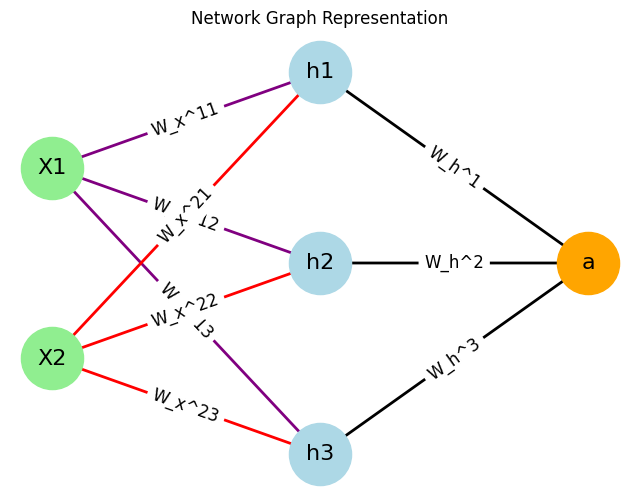

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Ensure the plot is displayed inline
%matplotlib inline

# Create a directed graph
G = nx.DiGraph()

# Add nodes representing inputs, hidden layers, and output
nodes = ['X1', 'X2', 'h1', 'h2', 'h3', 'a']
G.add_nodes_from(nodes)

# Add edges with corresponding weights
edges = [
    ('X1', 'h1', {'weight': 'W_x^11'}),
    ('X1', 'h2', {'weight': 'W_x^12'}),
    ('X1', 'h3', {'weight': 'W_x^13'}),
    ('X2', 'h1', {'weight': 'W_x^21'}),
    ('X2', 'h2', {'weight': 'W_x^22'}),
    ('X2', 'h3', {'weight': 'W_x^23'}),
    ('h1', 'a', {'weight': 'W_h^1'}),
    ('h2', 'a', {'weight': 'W_h^2'}),
    ('h3', 'a', {'weight': 'W_h^3'})
]

G.add_edges_from(edges)

# Define positions of the nodes for visualization
pos = {
    'X1': (-2, 1), 'X2': (-2, -1),
    'h1': (0, 2), 'h2': (0, 0), 'h3': (0, -2),
    'a': (2, 0)
}

# Plot the graph
plt.figure(figsize=(8, 6))

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=2000, nodelist=['X1', 'X2'])
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=2000, nodelist=['h1', 'h2', 'h3'])
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=2000, nodelist=['a'])

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=[('X1', 'h1'), ('X1', 'h2'), ('X1', 'h3')], edge_color='purple', width=2)
nx.draw_networkx_edges(G, pos, edgelist=[('X2', 'h1'), ('X2', 'h2'), ('X2', 'h3')], edge_color='red', width=2)
nx.draw_networkx_edges(G, pos, edgelist=[('h1', 'a'), ('h2', 'a'), ('h3', 'a')], edge_color='black', width=2)

# Draw labels for nodes and edges
nx.draw_networkx_labels(G, pos, font_size=16)
edge_labels = {('X1', 'h1'): 'W_x^11', ('X1', 'h2'): 'W_x^12', ('X1', 'h3'): 'W_x^13',
               ('X2', 'h1'): 'W_x^21', ('X2', 'h2'): 'W_x^22', ('X2', 'h3'): 'W_x^23',
               ('h1', 'a'): 'W_h^1', ('h2', 'a'): 'W_h^2', ('h3', 'a'): 'W_h^3'}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=12)

plt.title("Network Graph Representation")
plt.axis('off')  # Turn off the axis
plt.show()


To calculate the first element $ h_1 $ in the hidden layer output vector, we need to follow the forward propagation steps using the given neural network information.

Given:
- Input vector $ X = \begin{pmatrix} 1 \\ -1 \end{pmatrix} $
- Weight matrix for $ X $ to $ h $:
  
  $$
  W^X = \begin{pmatrix} 
  1/2 & 1/2 \\
  0 & 1 \\
  1 & 0 
  \end{pmatrix}
  $$

- The hidden layer has a sigmoid activation function, and we are asked to find the first element of the output of $ h_1 $.

#### Step-by-Step Calculation:

1. **Weighted sum for $ h_1 $**:
   
   $$
   z_1 = W^X_{11} \cdot X_1 + W^X_{12} \cdot X_2 = \frac{1}{2} \cdot 1 + \frac{1}{2} \cdot (-1) = 0
   $$

2. **Apply the sigmoid activation function to $ z_1 $**:
   The sigmoid function is defined as:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
   For $ z_1 = 0 $:
   
   $$
   h_1 = \sigma(0) = \frac{1}{1 + e^0} = \frac{1}{2} = 0.500
   $$

Thus, the first element in the hidden layer output vector $ h_1 $ is **0.500**.

Calculation of $ h_2 $:

1. **Weighted sum for $ h_2 $**:
   
   $$
   z_2 = W^X_{21} \cdot X_1 + W^X_{22} \cdot X_2 = 0 \cdot 1 + 1 \cdot (-1) = -1
   $$

2. **Apply the sigmoid activation function**:
   The sigmoid function is:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
   For $ z_2 = -1 $:

   $$
   h_2 = \sigma(-1) = \frac{1}{1 + e^{1}} = \frac{1}{1 + 2.718} = \frac{1}{3.718} \approx 0.269
   $$

Thus, the second element in the hidden layer output vector $ h_2 $ is **0.269**.

Calculation of $ h_3 $:

1. **Weighted sum for $ h_3 $**:
   
   $$
   z_3 = W^X_{31} \cdot X_1 + W^X_{32} \cdot X_2 = 1 \cdot 1 + 0 \cdot (-1) = 1
   $$

2. **Apply the sigmoid activation function**:
   The sigmoid function is:

   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
   For $ z_3 = 1 $:
   
   $$
   h_3 = \sigma(1) = \frac{1}{1 + e^{-1}} = \frac{1}{1 + 0.368} = \frac{1}{1.368} \approx 0.732
   $$

Thus, the third element in the hidden layer output vector $ h_3 $ is **0.732**.

Calculation of $ a $:

1. **Compute weighted sum**:
   The weighted sum $ z_a $ is calculated as:

   $$
   z_a = W^h_1 \cdot h_1 + W^h_2 \cdot h_2 + W^h_3 \cdot h_3
   $$
   Substituting the known values:

   $$
   z_a = (-1) \cdot h_1 + \frac{1}{2} \cdot h_2 + \frac{1}{2} \cdot h_3
   $$
   Using the previously calculated hidden layer outputs $ h_1 \approx 0.622 $, $ h_2 \approx 0.269 $, and $ h_3 \approx 0.732 $:

   $$
   z_a = (-1) \cdot 0.622 + \frac{1}{2} \cdot 0.269 + \frac{1}{2} \cdot 0.732
   $$

   $$
   z_a = -0.622 + 0.1345 + 0.366
   $$
   
   $$
   z_a = -0.622 + 0.5005 = -0.1215
   $$

2. **Apply the sigmoid activation function**:
   The sigmoid function is:

   $$
   \sigma(z_a) = \frac{1}{1 + e^{-z_a}}
   $$
   For $ z_a = -0.1215 $:
   
   $$
   a = \frac{1}{1 + e^{0.1215}} = \frac{1}{1 + 1.129} = \frac{1}{2.129} \approx 0.470
   $$

Thus, the output value at $ a $ is **0.470**.

In [1]:
import torch
import torch.nn as nn

# Sigmoid activation function
sigmoid = nn.Sigmoid()

# Input vector X (as a PyTorch tensor)
X = torch.tensor([1.0, -1.0])

# Weight matrix from X to hidden layer h (as a PyTorch tensor)
W_Xh = torch.tensor([[1/2, 1/2],
                     [0, 1],
                     [1, 0]])

# Weight matrix from hidden layer h to output a
W_hA = torch.tensor([-1, 1/2, 1/2])

# Step 1: Forward propagation to calculate hidden layer h
# Calculate weighted sum for h = W_Xh * X
z_h = torch.matmul(W_Xh, X)

# Apply the sigmoid function to the hidden layer (element-wise)
h = sigmoid(z_h)

# Display the hidden layer output
print(f"Hidden layer outputs: h1 = {h[0].item():.3f}, h2 = {h[1].item():.3f}, h3 = {h[2].item():.3f}")

# Step 2: Forward propagation from hidden layer to output a
# Calculate weighted sum for a = W_hA * h
z_a = torch.matmul(W_hA, h)

# Apply the sigmoid function to get the output a
a = sigmoid(z_a)

# Display the output value
print(f"Output value at a: {a.item():.3f}")


Hidden layer outputs: h1 = 0.500, h2 = 0.269, h3 = 0.731
Output value at a: 0.500


```{image} https://github.com/akkefa/ml-notes/releases/download/v0.1.0/nn1.png
:align: center
:alt: Computation Graph
:width: 80%
```

Consider we have a cross-entropy loss function for binary classification: 

L=−[𝑦 ln(𝑎)+(1−𝑦) ln(1−𝑎)], where 𝑎 is the probability out from the output layer activation function. We've built a computation graph of the network as shown below. The blue letters below are intermediate variable labels to help you understand the connection between the network architecture graph above and the computation graph.

When 𝑦=1, what is the gradient of the loss function w.r.t. 𝑊11?

To compute the gradient of the loss function $ L $ with respect to $ W_{11} $ using the computation graph method, we'll break the process into steps by using the chain rule. This will allow us to calculate intermediate gradients from the output back to the weight $ W_{11} $.

#### Step 1: Loss function definition
The cross-entropy loss function for binary classification is given as:

$$
L = -[y \ln(a) + (1 - y) \ln(1 - a)]
$$

Since $ y = 1 $ in this case, the loss simplifies to:

$$
L = -\ln(a)
$$

Here, $ a $ is the output from the network, which is the sigmoid activation of the weighted sum $ z_a $ of the hidden layer outputs.

#### Step 2: Sigmoid activation
The output $ a $ is given by the sigmoid activation function:

$$
a = \sigma(z_a) = \frac{1}{1 + e^{-z_a}}
$$

Where $ z_a $ is the weighted sum of the hidden layer outputs:

$$
z_a = W^h_1 h_1 + W^h_2 h_2 + W^h_3 h_3
$$

#### Step 3: Hidden layer calculation
Each hidden layer node $ h_1, h_2, h_3 $ is the output of a sigmoid activation function applied to the weighted sum of the input values:

$$
h_1 = \sigma(z_1) = \frac{1}{1 + e^{-z_1}}
$$

Where $ z_1 $ is the weighted sum for $ h_1 $, and for $ h_1 $, it is:

$$
z_1 = W_{11} X_1 + W_{12} X_2
$$

Now, we need to calculate the gradient of $ L $ with respect to $ W_{11} $.

#### Step 4: Compute gradients using chain rule

Using the chain rule, the gradient of $ L $ with respect to $ W_{11} $ is:

$$
\frac{\partial L}{\partial W_{11}} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z_a} \cdot \frac{\partial z_a}{\partial h_1} \cdot \frac{\partial h_1}{\partial z_1} \cdot \frac{\partial z_1}{\partial W_{11}}
$$

#### 1. $ \frac{\partial L}{\partial a} $
From the simplified loss function $ L = -\ln(a) $, we get:

$$
\frac{\partial L}{\partial a} = -\frac{1}{a}
$$

#### 2. $ \frac{\partial a}{\partial z_a} $
The gradient of the sigmoid function with respect to its input is:

$$
\frac{\partial a}{\partial z_a} = a(1 - a)
$$

#### 3. $ \frac{\partial z_a}{\partial h_1} $
From the equation for $ z_a $, we have:

$$
\frac{\partial z_a}{\partial h_1} = W^h_1
$$

#### 4. $ \frac{\partial h_1}{\partial z_1} $
The gradient of the sigmoid function at $ h_1 $ is:

$$
\frac{\partial h_1}{\partial z_1} = h_1(1 - h_1)
$$

#### 5. $ \frac{\partial z_1}{\partial W_{11}} $
From the equation for $ z_1 $, we have:

$$
\frac{\partial z_1}{\partial W_{11}} = X_1
$$

#### Step 5: Combine the gradients
Now we can combine all these partial derivatives:

$$
\frac{\partial L}{\partial W_{11}} = -\frac{1}{a} \cdot a(1 - a) \cdot W^h_1 \cdot h_1(1 - h_1) \cdot X_1
$$

Simplifying:

$$
\frac{\partial L}{\partial W_{11}} = -(1 - a) \cdot W^h_1 \cdot h_1(1 - h_1) \cdot X_1
$$

#### Step 6: Plug in the values
- $ a \approx 0.470 $ (from the previous forward pass)
- $ W^h_1 = -1 $ (given in the weight matrix for $ h \rightarrow a $)
- $ h_1 \approx 0.500 $ (from the previous calculation)
- $ X_1 = 1 $

Now substitute these into the equation:

$$
\frac{\partial L}{\partial W_{11}} = -(1 - 0.470) \cdot (-1) \cdot 0.500(1 - 0.500) \cdot 1
$$

$$
\frac{\partial L}{\partial W_{11}} = -0.530 \cdot (-1) \cdot 0.500 \cdot 0.500
$$

$$
\frac{\partial L}{\partial W_{11}} = 0.530 \cdot 0.250 = 0.133
$$

The gradient of the loss function with respect to $ W_{11} $ is **0.133** (to three decimal places).

In [2]:
import torch
import torch.nn as nn

# Sigmoid activation function
sigmoid = nn.Sigmoid()

# Input values
X1 = torch.tensor(1.0, requires_grad=False)   # X1 = 1
X2 = torch.tensor(-1.0, requires_grad=False)  # X2 = -1

# Weights for the input to hidden layer (W_Xh)
W11 = torch.tensor(1/2, requires_grad=True)   # W_11
W12 = torch.tensor(1/2, requires_grad=False)  # W_12
W21 = torch.tensor(0.0, requires_grad=False)  # W_21
W22 = torch.tensor(1.0, requires_grad=False)  # W_22
W31 = torch.tensor(1.0, requires_grad=False)  # W_31
W32 = torch.tensor(0.0, requires_grad=False)  # W_32

# Weights for the hidden layer to output layer (W_hA)
Wh1 = torch.tensor(-1.0, requires_grad=False)   # W^h_1
Wh2 = torch.tensor(1/2, requires_grad=False)    # W^h_2
Wh3 = torch.tensor(1/2, requires_grad=False)    # W^h_3

# Step 1: Compute the hidden layer values (h1, h2, h3)
z1 = W11 * X1 + W12 * X2  # z_1 = W_11 * X1 + W_12 * X2
z2 = W21 * X1 + W22 * X2  # z_2 = W_21 * X1 + W_22 * X2
z3 = W31 * X1 + W32 * X2  # z_3 = W_31 * X1 + W_32 * X2

# Apply sigmoid activation function for hidden layer
h1 = sigmoid(z1)
h2 = sigmoid(z2)
h3 = sigmoid(z3)

# Step 2: Compute the output (a) from the hidden layer values
z_a = Wh1 * h1 + Wh2 * h2 + Wh3 * h3
a = sigmoid(z_a)

# Ground truth (y = 1)
y = torch.tensor(1.0)

# Step 3: Binary cross-entropy loss function for y = 1
loss = - (y * torch.log(a) + (1 - y) * torch.log(1 - a))

# Step 4: Perform backpropagation to compute gradient of loss w.r.t. W11
loss.backward()

# Print the gradient of W11
print(f"Gradient of the loss function w.r.t. W11: {W11.grad.item():.3f}")


Gradient of the loss function w.r.t. W11: 0.125


To compute the updated weight $ W_{21}^{\text{new}} $, we need to use the gradient descent update rule. This rule is given as:

$$
W_{21}^{\text{new}} = W_{21}^{\text{old}} - \eta \cdot \frac{\partial L}{\partial W_{21}}
$$

Where:
- $ W_{21}^{\text{old}} $ is the initial weight.
- $ \eta = \frac{1}{2} $ is the learning rate.
- $ \frac{\partial L}{\partial W_{21}} $ is the gradient of the loss function with respect to $ W_{21} $.

#### Step-by-Step Computation

##### Step 1: Chain Rule for $ \frac{\partial L}{\partial W_{21}} $

Using the computation graph method and the chain rule, we can break down the gradient computation similarly to how we calculated $ \frac{\partial L}{\partial W_{11}} $:

$$
\frac{\partial L}{\partial W_{21}} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z_a} \cdot \frac{\partial z_a}{\partial h_2} \cdot \frac{\partial h_2}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_{21}}
$$

From the earlier derivation, we can reuse some of the intermediate values.

- $ \frac{\partial L}{\partial a} = -\frac{1}{a} $
- $ \frac{\partial a}{\partial z_a} = a(1 - a) $
- $ \frac{\partial z_a}{\partial h_2} = W^h_2 $
- $ \frac{\partial h_2}{\partial z_2} = h_2(1 - h_2) $
- $ \frac{\partial z_2}{\partial W_{21}} = X_1 $ (since $ z_2 = W_{21} X_1 + W_{22} X_2 $)

##### Step 2: Substituting the values

- From the previous steps, we know that:
  - $ a \approx 0.470 $
  - $ W^h_2 = \frac{1}{2} $
  - $ h_2 \approx 0.269 $
  - $ X_1 = 1 $

Now, substitute these values into the gradient expression:

$$
\frac{\partial L}{\partial W_{21}} = -\frac{1}{0.470} \cdot 0.470(1 - 0.470) \cdot \frac{1}{2} \cdot 0.269(1 - 0.269) \cdot 1
$$

Simplifying:

$$
\frac{\partial L}{\partial W_{21}} = -2.128 \cdot 0.470 \cdot 0.500 \cdot 0.269 \cdot 0.731
$$

$$
\frac{\partial L}{\partial W_{21}} \approx -2.128 \cdot 0.086 \approx -0.183
$$

#### Step 3: Update the weight $ W_{21} $

Now we can apply the gradient descent update rule:

$$
W_{21}^{\text{new}} = W_{21}^{\text{old}} - \eta \cdot \frac{\partial L}{\partial W_{21}}
$$

Substitute the values:

- $ W_{21}^{\text{old}} = 0 $ (from the given weight matrix)
- $ \eta = \frac{1}{2} $
- $ \frac{\partial L}{\partial W_{21}} \approx -0.183 $

$$
W_{21}^{\text{new}} = 0 - \frac{1}{2} \cdot (-0.183) = 0 + 0.0915
$$

Thus, the updated weight $ W_{21}^{\text{new}} $ is approximately **0.092** (to three decimal places).

The updated weight $ W_{21}^{\text{new}} $ is **0.092**.

In [3]:
import torch
import torch.nn as nn

# Sigmoid activation function
sigmoid = nn.Sigmoid()

# Input values
X1 = torch.tensor(1.0, requires_grad=False)   # X1 = 1
X2 = torch.tensor(-1.0, requires_grad=False)  # X2 = -1

# Weights for the input to hidden layer (W_Xh)
W11 = torch.tensor(1/2, requires_grad=False)   # W_11
W12 = torch.tensor(1/2, requires_grad=False)   # W_12
W21 = torch.tensor(0.0, requires_grad=True)    # W_21 (we are interested in updating this weight)
W22 = torch.tensor(1.0, requires_grad=False)   # W_22
W31 = torch.tensor(1.0, requires_grad=False)   # W_31
W32 = torch.tensor(0.0, requires_grad=False)   # W_32

# Weights for the hidden layer to output layer (W_hA)
Wh1 = torch.tensor(-1.0, requires_grad=False)  # W^h_1
Wh2 = torch.tensor(1/2, requires_grad=False)   # W^h_2
Wh3 = torch.tensor(1/2, requires_grad=False)   # W^h_3

# Step 1: Compute the hidden layer values (h1, h2, h3)
z1 = W11 * X1 + W12 * X2  # z_1 = W_11 * X1 + W_12 * X2
z2 = W21 * X1 + W22 * X2  # z_2 = W_21 * X1 + W_22 * X2
z3 = W31 * X1 + W32 * X2  # z_3 = W_31 * X1 + W_32 * X2

# Apply sigmoid activation function for hidden layer
h1 = sigmoid(z1)
h2 = sigmoid(z2)
h3 = sigmoid(z3)

# Step 2: Compute the output (a) from the hidden layer values
z_a = Wh1 * h1 + Wh2 * h2 + Wh3 * h3
a = sigmoid(z_a)

# Ground truth (y = 1)
y = torch.tensor(1.0)

# Step 3: Binary cross-entropy loss function for y = 1
loss = - (y * torch.log(a) + (1 - y) * torch.log(1 - a))

# Step 4: Perform backpropagation to compute gradient of loss w.r.t. W21
loss.backward()

# Display the gradient of W21
print(f"Gradient of the loss function w.r.t. W21: {W21.grad.item():.3f}")

# Step 5: Update W21 using gradient descent with learning rate eta = 1/2
eta = 1/2
W21_new = W21 - eta * W21.grad

# Display the updated value of W21
print(f"Updated weight W21: {W21_new.item():.3f}")


Gradient of the loss function w.r.t. W21: -0.049
Updated weight W21: 0.025
